In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv('features_df.csv')

# Step 2: Define feature columns and target
feature_cols = ['corner_count', 'circularity', 'aspect_ratio', 'extent', 'avg_hue']
X = df[feature_cols]
y = df['label']

# Step 3: Encode labels if they're non-numeric
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = clf.predict(X_test)

# Step 7: Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.2857142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.60      0.57        25
           1       0.33      0.27      0.30        22
           2       0.09      0.10      0.09        21
           3       0.18      0.15      0.16        20
           4       0.11      0.14      0.12        14
           5       0.08      0.06      0.06        18
           6       0.48      0.55      0.51        20

    accuracy                           0.29       140
   macro avg       0.26      0.27      0.26       140
weighted avg       0.28      0.29      0.28       140



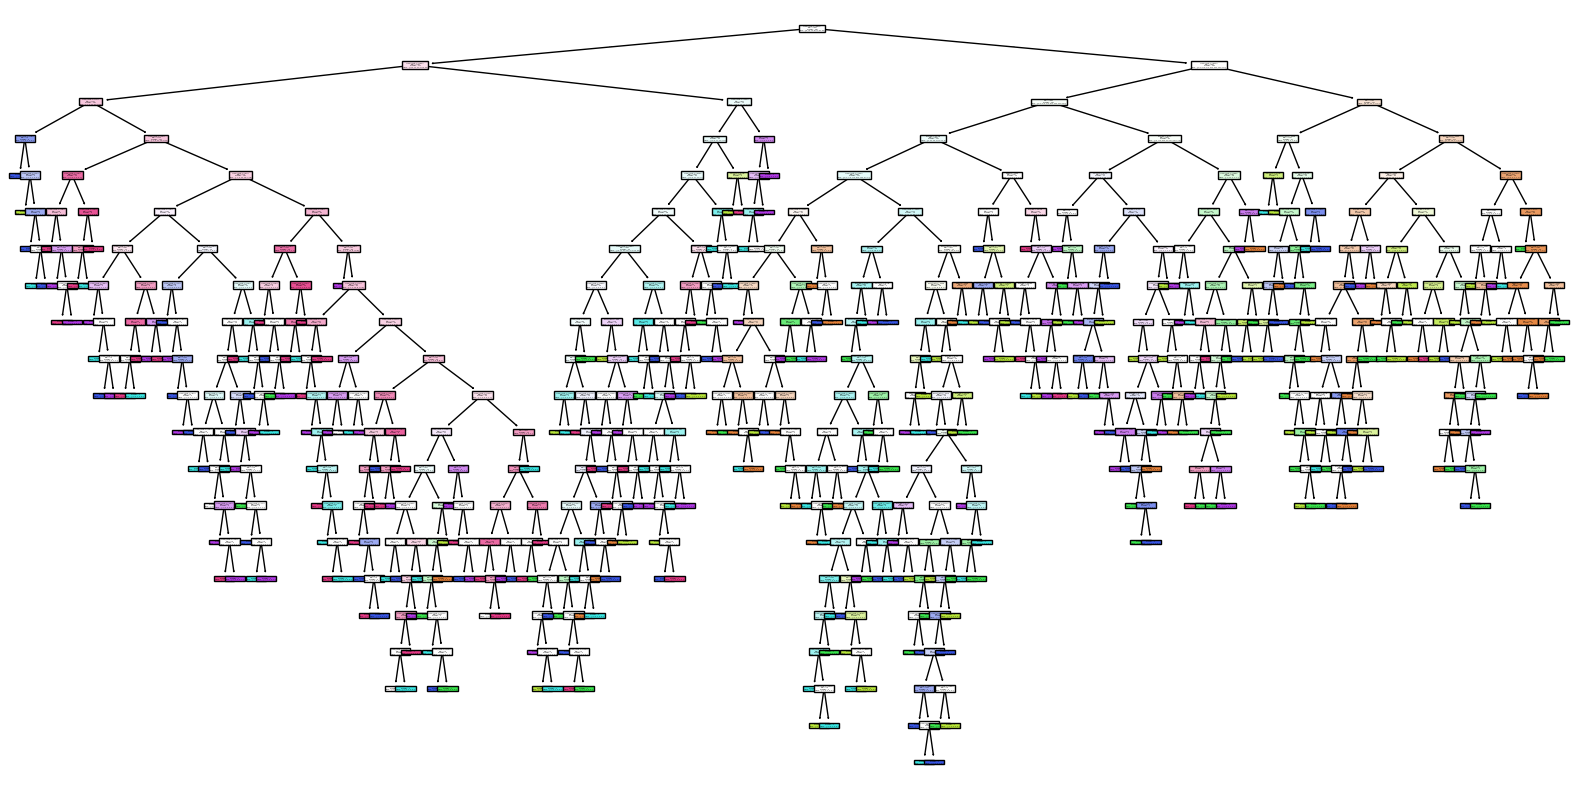

In [2]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_cols, filled=True)
plt.show()


In [3]:
from sklearn.tree import export_text

# Export the decision rules as plain text
tree_rules = export_text(clf, feature_names=feature_cols)
print(tree_rules)


|--- corner_count <= 2861.50
|   |--- corner_count <= 1660.00
|   |   |--- corner_count <= 171.50
|   |   |   |--- corner_count <= 139.00
|   |   |   |   |--- class: 4
|   |   |   |--- corner_count >  139.00
|   |   |   |   |--- corner_count <= 152.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- corner_count >  152.00
|   |   |   |   |   |--- corner_count <= 161.00
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- corner_count >  161.00
|   |   |   |   |   |   |--- corner_count <= 167.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- corner_count >  167.00
|   |   |   |   |   |   |   |--- class: 4
|   |   |--- corner_count >  171.50
|   |   |   |--- corner_count <= 273.50
|   |   |   |   |--- corner_count <= 233.50
|   |   |   |   |   |--- corner_count <= 205.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- corner_count >  205.50
|   |   |   |   |   |   |--- corner_count <= 213.50
|   |   |   |   |   |   |   |--- class: 5
